Python version = 3.9.5
yfinance version = 0.1.69
TSLA
Investment: Tesla, Inc.
Today =2022-01-19T19:33:15
<class 'pandas.core.frame.DataFrame'>
                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2019-12-31  81.000000  84.258003  80.416000  83.666000  51428500          0   
2020-01-02  84.900002  86.139999  84.342003  86.052002  47660500          0   
2020-01-03  88.099998  90.800003  87.384003  88.601997  88892500          0   

            Stock Splits  
Date                      
2019-12-31           0.0  
2020-01-02           0.0  
2020-01-03           0.0  

                   Open         High          Low        Close    Volume  \
Date                                                                       
2022-01-13  1109.069946  1115.599976  1026.540039  1031.560059  32403300   
2022-01-14  1019.880005  1052.000000  1013.380005  1049.609985  24246600   
2022-01-18  1026.6099

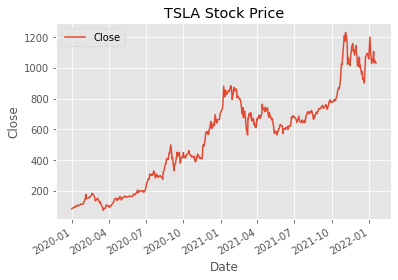

AxesSubplot(0.125,0.2;0.775x0.68)


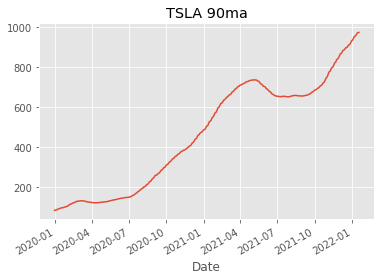

VOO
Investment: Vanguard S&P 500 ETF
Today =2022-01-19T19:33:21
<class 'pandas.core.frame.DataFrame'>
                  Open        High         Low       Close   Volume  \
Date                                                                  
2019-12-31  285.242227  286.656179  284.893594  286.472168  2512700   
2020-01-02  287.915242  289.038666  286.995187  289.009613  3142400   
2020-01-03  285.910460  287.982962  285.736144  286.898285  3247900   

            Dividends  Stock Splits  
Date                                 
2019-12-31        0.0             0  
2020-01-02        0.0             0  
2020-01-03        0.0             0  

                  Open        High         Low       Close    Volume  \
Date                                                                   
2022-01-13  434.089996  434.720001  426.089996  427.100006   7521300   
2022-01-14  423.950012  427.579987  422.809998  427.230011   9959200   
2022-01-18  422.619995  424.980011  417.329987  419.739990  106

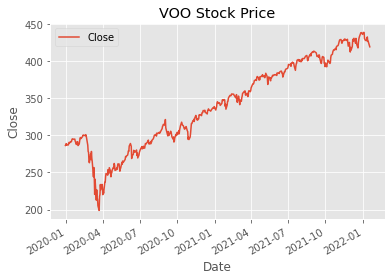

AxesSubplot(0.125,0.2;0.775x0.68)


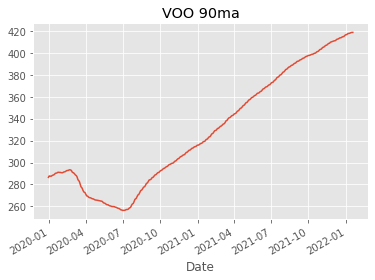

In [7]:
import platform
print('Python version = ' + platform.python_version())
import yfinance as yf
print('yfinance version = ' + yf.__version__)
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

tick1 = 'TSLA'
tick2 = 'VOO'

def yfin_load(tickersymbol):
    print(tickersymbol)
    tickerdata = yf.Ticker(tickersymbol) #yfinance Ticker-Object
    tickerinfo= tickerdata.info #dictionary
    investment=tickerinfo['shortName']
    print('Investment: ' + investment)
    
    today = datetime.datetime.today().replace(microsecond=0).isoformat()
    print ('Today =' + today)
    
    tickerDF = tickerdata.history(period='1d',start='2020-1-1', end=today[:10]) #w isoformat, first 10 chars are the date
    print(type(tickerDF))
    print(tickerDF.head(3))
    print('')
    print(tickerDF.tail(3))
    print('')
    priceLast = tickerDF['Close'].iloc[-1] #last row
    priceYest = tickerDF['Close'].iloc[-2] #row before last
    priceChange = priceLast - priceYest
    print(investment + ' Yesterday Price = ' + str("%.2f" % priceYest))
    print(investment + ' Last Price = ' + str("%.2f" % priceLast))
    print(investment + ' Price Change =' + str("%.2f" % priceChange))
    
def stats_plot(tickersymbol):
    tickerdata = yf.Ticker(tickersymbol) #yfinance Ticker-Object
    today = datetime.datetime.today().replace(microsecond=0).isoformat()
    tickerDF = tickerdata.history(period='1d',start='2020-1-1', end=today[:10]) #w isoformat, first 10 chars are the date
    tickerDF['90ma']=tickerDF['Close'].rolling(window=90, min_periods=0).mean()
    tickerDF['200ma']=tickerDF['Close'].rolling(window=200, min_periods=0).mean()
    print(tickerDF['90ma'].plot())
    plt.title(tickersymbol + ' 90ma')
    plt.show()
    style.use('ggplot')
    
    
def yfin_plot(tickersymbol):
    tickerdata = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().replace(microsecond=0).isoformat()
    tickerDF = tickerdata.history(period='1d',start='2020-1-1', end=today[:10]) #w isoformat, first 10 chars are the date
    print(tickerDF['Close'].plot())
    plt.grid(True)    
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.title(tickersymbol + ' Stock Price')
    plt.show()
    style.use('ggplot')
    
def doAll(tickersymbol):
    yfin_load(tickersymbol)
    yfin_plot(tickersymbol)
    stats_plot(tickersymbol)
    
doAll(tick1)
doAll(tick2)

# yfin_plot(tick1)
# print('')
# yfin_plot(tick2)
# print('')
# yfin_load(tick1)
# print('')
# yfin_load(tick2)
# print('')